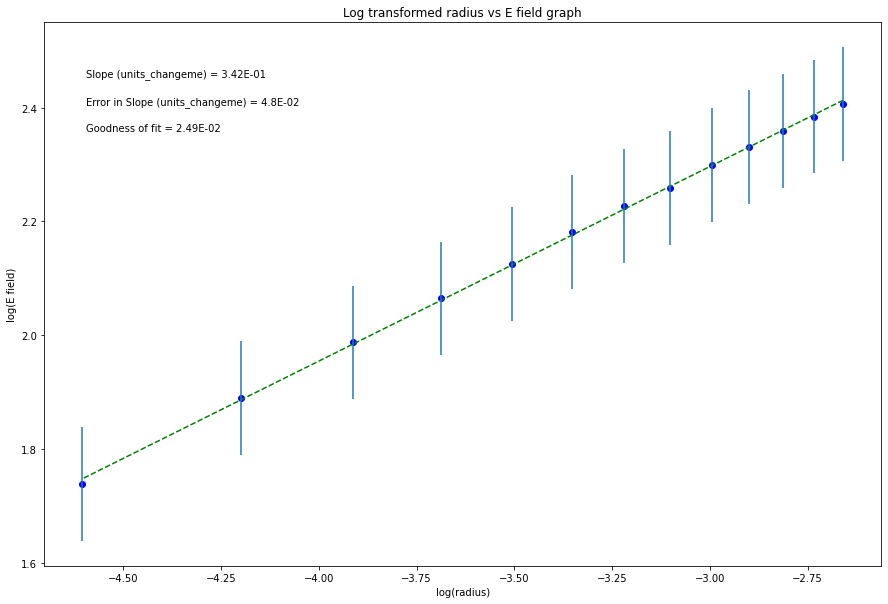

In [2]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018, Aug 2020(for Python 3.8)
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
r = np.array([7, 6.5,6,5.5,5,4.5,4,3.5,3,2.5,2,1.5,1])/100 # convert to meters

ch1 = np.array([10.47,10.24,10.08,9.78,9.44,9.12,8.87,8.4,8,7.47,6.9,6.26,5.62]) #voltages
ch2 = np.array([11.35,11.09,10.8,10.55,10.26,9.91,9.55,9.19,8.64,8.22,7.7,7.04,6.08])
ch3 = np.array([11.48,11.23,10.88,10.54,10.20,9.68,9.4,9.0,8.48,7.96,7.29,6.54,5.36])

# element wise mean
mean_ch = np.mean([ch1, ch2, ch3], axis=0)

r_log = np.log(r)

log_mean_ch = np.log(mean_ch)

#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_channel = np.array([.1 for i in range(len(ch1))])
err_r = np.array([.1/100 for i in range(len(r))])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = r_log   #this should be the array you want to plot on the x axis
y = log_mean_ch
dy = err_channel  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('log(radius)')
plt.ylabel('log(E field)')
plt.title('Log transformed radius vs E field graph')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (units_changeme) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
